# Ermine Tutorial 01
## Preprocessing Swift files for Ermine analysis

by Sebastian Malkusch (c) 2021  
malkusch@med.uni-frankfurt.de  
Data Science| Klinische Pharmakologie  
Institut für Klinische Pharmakologie  
Goethe - Universität  
Theodor-Stern-Kai 7  
60590 Frankfurt am Main

## Import libraries
You need to install Ermine prior to usage.  
Run  
python -m pip install git+https://github.com/SMLMS/pyErmine  
from the command line  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ermine as em
from matplotlib import pyplot as plt

## Import data from swift
Store the path to the swift data set in the variable "file_name"  
The routine imports the tracked localization data to a data frame (data_df).

In [2]:
file_name = "data/Fab_CS6_cell20_tracked.csv"
data_df = pd.read_csv(filepath_or_buffer = file_name)
data_df.head()

,id,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],uncertainty_xy [nm],jd,...,seg.lifetime,seg.id,seg.loc_count,seg.track_pos,track.noise,track.t_start,track.lifetime,track.id,track.loc_count,track.seg_count
0,1,1,718.6,20049.1,130.8,623.9,13.5,10.3,17.2,51.918879,...,27,144,28,0,0,1,27,109,28,1
1,2,1,778.3,22251.2,155.8,726.3,38.5,9.3,18.6,27.132637,...,13,129,14,0,0,1,13,94,14,1
2,3,1,965.1,25752.1,182.6,700.0,18.7,10.3,26.7,114.525849,...,5,188,6,0,0,1,5,139,6,1
3,4,1,614.3,25414.8,168.7,236.5,18.7,10.3,62.7,6.519202,...,1,45,2,0,0,1,1,32,2,1
4,5,1,1422.2,19438.1,168.3,1009.9,40.4,8.9,15.6,35.830294,...,15,43,16,0,0,1,15,30,16,1


## Transform data
Convert single-particle tracking data into the format required for ermine.
The result is a ne data frame jump_df-
Each line in jump_df represents particle jump with informaion about the particle's departure position and time and its destination position and time.
The jump_df data frame is stored to the results folder of the tutorial.

In [3]:
jump_df = em.preprocess_swift_data(data_df)
jump_df.to_csv("results/Fab_CS6_cell20_jumps.csv")
jump_df[["track.id_departure", "frame_departure", "x [nm]_departure", "y [nm]_departure",
        "track.id_destination", "frame_destination", "x [nm]_destination", "y [nm]_destination",
        "jump_distance"]].head()

,track.id_departure,frame_departure,x [nm]_departure,y [nm]_departure,track.id_destination,frame_destination,x [nm]_destination,y [nm]_destination,jump_distance
0,1,1,31496.6,32117.6,1.0,2.0,31489.3,32106.5,13.285330
1,1,2,31489.3,32106.5,1.0,3.0,31496.3,32110.3,7.964923
2,1,3,31496.3,32110.3,1.0,4.0,31470.3,32067.1,50.420631
3,1,4,31470.3,32067.1,1.0,5.0,31472.0,32093.7,26.654268
4,1,5,31472.0,32093.7,1.0,6.0,31494.0,32146.3,57.015437


## Plot PDF of jump distances
KDE-smoothed line-plot of the data sets jump distance distribution

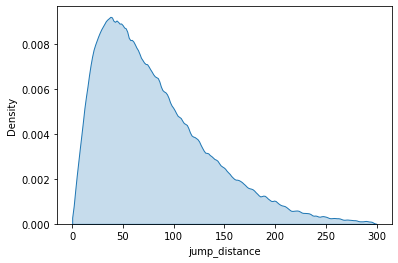

In [4]:
splot = sns.kdeplot(data=jump_df, x="jump_distance", fill = True, bw_adjust = 0.3, clip = [0, 300])
plt.show()